In [ ]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

# PyTorch Basics

En PyTorch la unidad basica con la que se trabaja son los tensores. Como se recordara un tensor es una representación más abstracta de los objetos matemáticos que usamos constantemente (i.e. escalares, vectors, matrices). Acontinuación vamos a definir algunos tensores simples.

In [ ]:
# dtype: float (float32), float16, float64 (double) ...
a = torch.tensor(1,dtype=torch.float)
b = torch.tensor([2,3],dtype=torch.float)
C = torch.tensor([[4,5],[6,7]]).float()
print(a)
print(b)
print(C)

tensor(1.)
tensor([2., 3.])
tensor([[4., 5.],
        [6., 7.]])


Ahora veamos como realizar algunas operacione entre tensores en PyTorch

In [ ]:
print(a * b)
print(a * C)
print(C @ b) # Matrix multiplication, in general sum_k A_ij....k B_kpq....r
print(C * C) # Element wise multiplication
print(C @ C) # Matrix multiplication

tensor([2., 3.])
tensor([[4., 5.],
        [6., 7.]])
tensor([23., 33.])
tensor([[16., 25.],
        [36., 49.]])
tensor([[46., 55.],
        [66., 79.]])


El corazón de PyTorch es el de poder realizar auto diferenciación (Autograd o Autodiff). Veamos una operación simple y como calcular la derivadas parciales con respecto a cada variable

In [ ]:
a = torch.tensor(2,dtype=torch.float,requires_grad=True)
b = torch.tensor(3).float().requires_grad_(True)
c = torch.tensor(4).float().requires_grad_(True)
d = a + b * c
d.backward()
print(a.grad,b.grad,c.grad)

tensor(1.) tensor(4.) tensor(3.)


Veamos ahora un ejemplo un poco mas complicado para poder apreciar el alcance y todo lo que se puede lograr con el Autograd.

In [ ]:
A = torch.tensor([[1,2],[3,4]]).float().requires_grad_(True)
det_A = torch.det(A)
det_A.backward()
print(A.grad)

tensor([[ 4., -3.],
        [-2.,  1.]])


In [ ]:
inv_A = torch.linalg.inv(A)
# Calculemos la derivada del determinante de un matriz con respecto 
# a los elementos de la matriz original
print(inv_A.T * det_A)

tensor([[ 4., -3.],
        [-2.,  1.]], grad_fn=<MulBackward0>)


# Simple Linear Regression

Veamos un caso simple en como aplicar los que hemos aprendido de PyTorch a un problema comun: regresion lineal. Primero creemos algunos datos randoms.

In [ ]:
N = 100
x_data = torch.linspace(0,5,N).float()
y_data = 2 * x_data + 5 + 2*torch.randn(N)

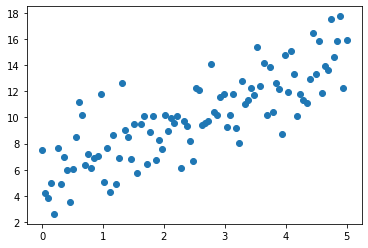

In [ ]:
plt.scatter(x_data,y_data)

Problema: Queremos encontrar la recta que mejor se ajuste a los datos que generamos.

Sabemos que nuestra recta tiene 2 parametros: w (pendiente) y b (intercepto). Asi que el problema se centra en encontrar los ***parametros*** optimos que ajustan al ***modelo*** a los datos que tenemos. Para medir que "tan bien" se ajusta nuestro modelo a nuestros datos, vamos a necesitar de algun tipo de medida. A esta medida se le conoce como ***función de perdida*** (Loss Function). La función de pérdida más común en regresión es la de "mean square error loss", la cual se define acontinuacion. 

$\mathcal{L}(ypred,y) = \frac{1}{n}\sum_{i=0}^n \vert ypred_i - y_i \vert ^ 2$

Como se puede ver en esta ecuación, cuanto más se parezca $ypred$ al valor de $y$, la función de perdida se vuelve más pequeña. Entonces el problema se reduce a un problema de minimización. 

Utilizemos el método del gradient descent para poder encontrar los parámetros de la recta que se adecua mejor a nuestros datos. 

In [ ]:
# Definimos los parametros de nuestro modelo
w = torch.tensor(1).float().requires_grad_(True)
b = torch.tensor(1).float().requires_grad_(True)

# Learning rate
lr = 0.1

for epoch in range(100):
  # Hacemos una prediccion con los valores de los parametros actuales
  y_pred = w * x_data + b
  # Calculamos la perdida (loss function)
  loss = torch.mean((y_pred - y_data)**2)
  # Realizamos el backpropagation para la calcular la gradiente 
  # del loss function con respecto a cada variable
  loss.backward()
  if epoch % 10 == 0:
    print(f"epoch: {epoch}, loss: {loss.item()}")
  # Actualizamos los parametros siguiendo la direccion
  # contraria del gradiente
  w.data = w.data - lr * w.grad
  b.data = w.data - lr * b.grad
print(w,b)

epoch: 0, loss: 47.3668098449707
epoch: 10, loss: 21.294113159179688
epoch: 20, loss: 4.089108467102051
epoch: 30, loss: 4.1626152992248535
epoch: 40, loss: 3.722677230834961
epoch: 50, loss: 3.690157413482666
epoch: 60, loss: 3.6634583473205566
epoch: 70, loss: 3.6514992713928223
epoch: 80, loss: 3.647493362426758
epoch: 90, loss: 3.645792245864868
tensor(1.8567, requires_grad=True) tensor(5.3419, requires_grad=True)


Realicemos lo mismo pero utilizando algunas de las herramientas que nos da PyTorch

In [ ]:
# Definimos los parametros: w y b
linear_model = nn.Linear(1,1)
# Veamos los parámetros de nuestro modelo
for param in linear_model.parameters():
  print(param)

# Definimos nuestra funcion de perdida
crit = nn.MSELoss()

# Definimos nuestro optimizador
# en otras palabras, la forma en la que actualizaremos nuestros parámetros
# w.data = w.data - lr * w.grad
# b.data = b.data - lr * b.grad
optim = torch.optim.SGD(linear_model.parameters(),lr=0.1)

# Preparamos nuestros datos
x = x_data.reshape(-1,1)
y = y_data.reshape(-1,1)

for epoch in range(100):
  # Volvemos todas las gradientes zero para evitar acumulación de gradientes
  optim.zero_grad()
  # Hacemos una predicción con los valores actuales de los parámetros
  y_pred = linear_model(x)
  # Calculamos la perdida
  loss = crit(y_pred, y)
  if epoch % 10 == 0:
    print(f"epoch: {epoch}, loss: {loss.item()}")
  # Realizamos el backpropagation
  loss.backward()
  # Actualizamos los parametros
  optim.step()

print([param for param in linear_model.parameters()])

Parameter containing:
tensor([[0.4021]], requires_grad=True)
Parameter containing:
tensor([-0.9842], requires_grad=True)
epoch: 0, loss: 107.57826232910156
epoch: 10, loss: 8.776447296142578
epoch: 20, loss: 4.810930252075195
epoch: 30, loss: 4.075603485107422
epoch: 40, loss: 3.8103387355804443
epoch: 50, loss: 3.7084033489227295
epoch: 60, loss: 3.6690759658813477
epoch: 70, loss: 3.653900384902954
epoch: 80, loss: 3.648043632507324
epoch: 90, loss: 3.6457836627960205
[Parameter containing:
tensor([[1.8561]], requires_grad=True), Parameter containing:
tensor([5.3463], requires_grad=True)]


# Multi Layer Perceptron

Ahora veamos un modelo un poco más complicado que un simple modelo lineal. Un MultiLayer Perceptron básicamente consiste en un sequencia de multiplicaciones matriciales

In [ ]:
mnist_train_ds = torchvision.datasets.MNIST("./",download=True,train=True,transform=torchvision.transforms.ToTensor())
mnist_test_ds = torchvision.datasets.MNIST("./",download=True,train=False,transform=torchvision.transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Veamos la forma de la data en MNIST

In [ ]:
print("Total cantidad de datos en MNIST: ",len(mnist_train_ds))
x, y = next(iter(mnist_train_ds))
print(x.shape)

Total cantidad de datos en MNIST:  60000
torch.Size([1, 28, 28])


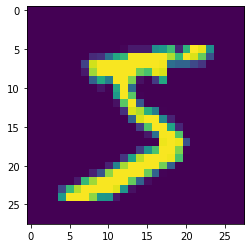

In [ ]:
plt.imshow(x.reshape(28,28).numpy())

Cuando entrenamos redes neuronales, es prácticamente imposible utilizar todos los datos ya que no tenemos suficiente memoria (RAM memory). Por lo que se acostumbra entrenar utilizando "lotes" o "batches" más pequeños, lo cual tambien trae beneficios en la precision alcanzada por la red.

In [ ]:
mnist_train_loader = torch.utils.data.DataLoader(mnist_train_ds,batch_size=128)
mnist_test_loader = torch.utils.data.DataLoader(mnist_test_ds,batch_size=128)

In [ ]:
for x, y in mnist_train_loader:
  print(x.shape, y.shape)
  break

torch.Size([128, 1, 28, 28]) torch.Size([128])


Otro de los beneficios que nos provee PyTorch es el de poder usar el poder computacional de las tarjetas gráficas (GPU).

In [ ]:
dev = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
x = torch.rand(3,3)
print(x)

tensor([[0.8295, 0.2494, 0.0473],
        [0.3213, 0.6695, 0.4275],
        [0.6801, 0.1607, 0.7568]])


In [ ]:
# y = torch.rand(3,3,device=dev)
y = torch.rand(3,3).to(dev)
print(y)

tensor([[0.0439, 0.2385, 0.8466],
        [0.6189, 0.1942, 0.1437],
        [0.9801, 0.1374, 0.3346]])


In [ ]:
x + y

tensor([[0.8733, 0.4879, 0.8939],
        [0.9402, 0.8636, 0.5711],
        [1.6602, 0.2981, 1.0914]])

Ahora definamos nuestro modelo.

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,10)
).to(dev)

Definamos nuestro loss function y el optimizador que será usado en el entrenamiento

In [ ]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.001)

Pongamos el algoritmo de entrenamiento anteriormente usado dentro de una función.

In [ ]:
def evaluate(model, loader, crit):
  model.eval()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in loader:
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100* corrects / total
  avg_loss /= len(loader)  
  return avg_loss, acc

def train_one_epoch(model, train_loader, crit, optim):
  model.train()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in train_loader:
    optim.zero_grad()
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    loss.backward()
    optim.step()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100 * corrects / total
  avg_loss /= len(train_loader)
  return avg_loss, acc

def train(model, train_loader, test_loader, crit, optim, epochs = 20):
  for epoch in range(epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader,crit, optim)
    test_loss, test_acc = evaluate(model, test_loader, crit)
    print(f"epoch: {epoch}, train loss: {train_loss}, train acc: {train_acc}%, test loss: {test_loss}, test acc: {test_acc}%")

Entrenemos nuestro modelo!

In [ ]:
EPOCHS = 10
train(model,mnist_train_loader,mnist_test_loader,crit,optim,epochs=EPOCHS)

epoch: 0, train loss: 0.3732091150026141, train acc: 90.17%, test loss: 0.19339300893082084, test acc: 94.41
epoch: 1, train loss: 0.1641785548185743, train acc: 95.25833333333334%, test loss: 0.13102325892276306, test acc: 96.17
epoch: 2, train loss: 0.11391341159624585, train acc: 96.69166666666666%, test loss: 0.10413809058468647, test acc: 96.72
epoch: 3, train loss: 0.08479830817476328, train acc: 97.52333333333333%, test loss: 0.09132268213773076, test acc: 97.1
epoch: 4, train loss: 0.06556333974996673, train acc: 98.09666666666666%, test loss: 0.08537579793925103, test acc: 97.26
epoch: 5, train loss: 0.05191008025891523, train acc: 98.54666666666667%, test loss: 0.08129220091313406, test acc: 97.33
epoch: 6, train loss: 0.04128634548440242, train acc: 98.88333333333334%, test loss: 0.078814100173134, test acc: 97.44
epoch: 7, train loss: 0.03304218499611483, train acc: 99.16166666666666%, test loss: 0.07861757691164172, test acc: 97.59
epoch: 8, train loss: 0.02601754004314446

Visualicemos algunas de las predicciones

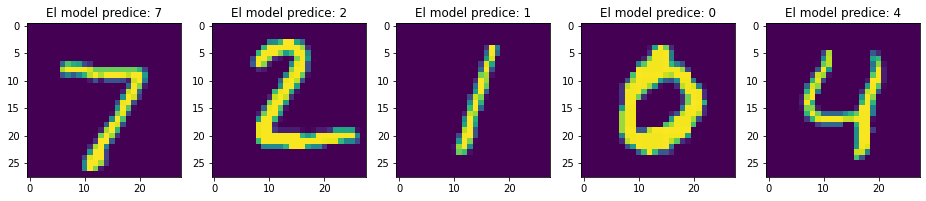

In [ ]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i,(x, y) in enumerate(iter(mnist_test_ds)):
  if i == N:
    break
  x = x.reshape(1,1,28,28).to(dev)
  ypred = model(x)
  axs[i].imshow(x.cpu().reshape(28,28).numpy())
  axs[i].set_title(f"El model predice: {torch.argmax(ypred)}")

Ahora repitamos lo mismo con un dataset similar! El FashionMNIST

In [ ]:
fashion_mnist_train_ds = torchvision.datasets.FashionMNIST("./",download=True,train=True,transform=torchvision.transforms.ToTensor())
fashion_mnist_test_ds = torchvision.datasets.FashionMNIST("./",download=True,train=False,transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [ ]:
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

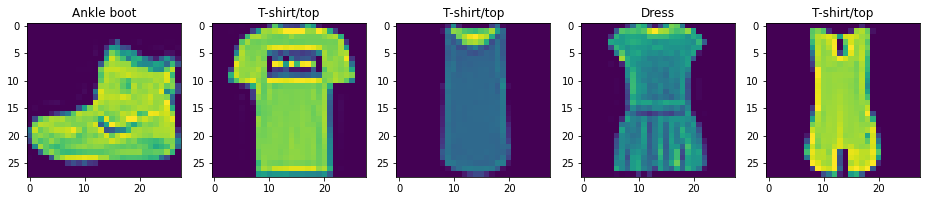

In [ ]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x,y) in enumerate(fashion_mnist_train_ds):
  if i == N:
    break
  axs[i].imshow(x.reshape(28,28).numpy())
  axs[i].set_title(labels[y])

In [ ]:
fashion_mnist_train_dl = torch.utils.data.DataLoader(fashion_mnist_train_ds,batch_size=128)
fashion_mnist_test_dl = torch.utils.data.DataLoader(fashion_mnist_test_ds,batch_size=128)

In [ ]:
fashion_model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,10)
).to(dev)

In [ ]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.SGD(fashion_model.parameters(),lr=0.01)
train(fashion_model,fashion_mnist_train_dl,fashion_mnist_test_dl,crit,optim,epochs=10)

epoch: 0, train loss: 1.4045063414807513, train acc: 61.306666666666665%, test loss: 0.9432753090617023, test acc: 67.72
epoch: 1, train loss: 0.8176697116416655, train acc: 72.17666666666666%, test loss: 0.7515628375584567, test acc: 73.48
epoch: 2, train loss: 0.6928872312309899, train acc: 76.675%, test loss: 0.6684970965113821, test acc: 77.03
epoch: 3, train loss: 0.6263319012452798, train acc: 79.27%, test loss: 0.6177784193165695, test acc: 78.97
epoch: 4, train loss: 0.5832778273869171, train acc: 80.58666666666667%, test loss: 0.5842126317416565, test acc: 80.06
epoch: 5, train loss: 0.5533864711012159, train acc: 81.51666666666667%, test loss: 0.5604930927481833, test acc: 81.04
epoch: 6, train loss: 0.5313659189606527, train acc: 82.14166666666667%, test loss: 0.5427789714517472, test acc: 81.46
epoch: 7, train loss: 0.5143599782162892, train acc: 82.64833333333333%, test loss: 0.5289633911621722, test acc: 81.73
epoch: 8, train loss: 0.5007186240351784, train acc: 82.975%, 

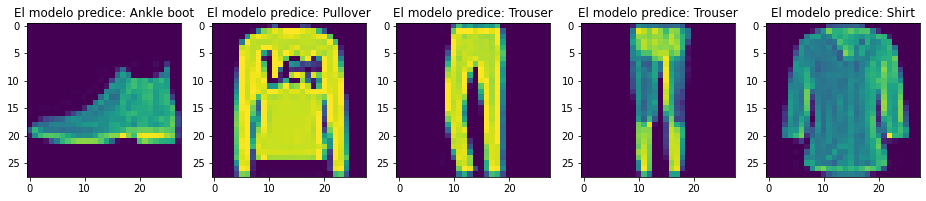

In [ ]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x, y) in enumerate(fashion_mnist_test_ds):
  if i == N:
    break
  x = x.reshape(1,1,28,28).to(dev)
  ypred = fashion_model(x)
  axs[i].imshow(x.cpu().reshape(28,28).numpy())
  axs[i].set_title(f"El modelo predice: {labels[torch.argmax(ypred)]}")